<a href="https://colab.research.google.com/github/siva-Parvathi-M/My-_Projects/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install (if needed) and import packages
!pip install pandas matplotlib seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Source Data/Telco_Customer_Churn_Sample.csv")

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


**Automated EDA (Exploratory Data Analysis) Pipeline**

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
🔍 Dataset Shape: (5, 21)

📊 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5 non-null      object 
 1   gender            5 non-null      object 
 2   SeniorCitizen     5 non-null      int64  
 3   Partner           5 non-null      object 
 4   Dependents        5 non-null      object 
 5   tenure            5 non-null      int64  
 6   PhoneService      5 non-null      object 
 7   MultipleLines     5 non-null      object 
 8   InternetService   5 non-null      object 
 9   Onl

<ipython-input-8-bb490dfbe784>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='Set2')


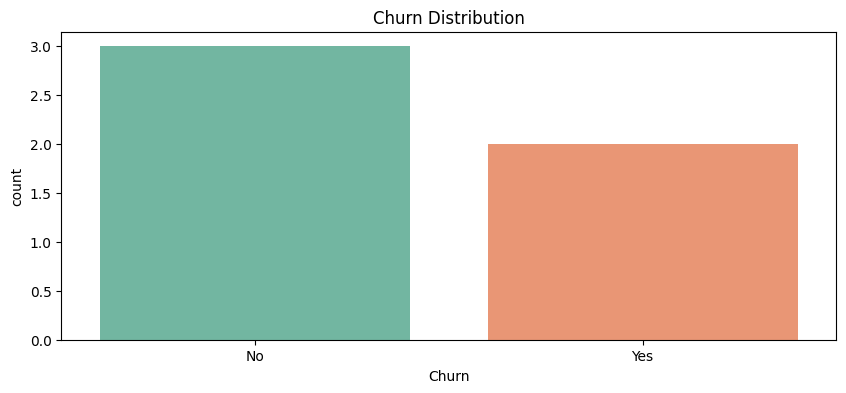

⚠️ 'MonthlySpend' column not found for plotting.


In [ ]:
# Print actual column names
print("Columns:", df.columns.tolist())

# EDA Function
def automated_eda(data):
    print("🔍 Dataset Shape:", data.shape)
    print("\n📊 Column Info:")
    print(data.info())

    print("\n📈 Descriptive Statistics:")
    print(data.describe(include='all'))

    print("\n🧹 Missing Values:")
    print(data.isnull().sum())

    print("\n📌 Class Distribution (Churn):")
    print(data['Churn'].value_counts())

    # Plotting
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x='Churn', palette='Set2')
    plt.title('Churn Distribution')
    plt.show()

    if 'MonthlySpend' in data.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=data, x='Churn', y='MonthlySpend')
        plt.title('Monthly Spend vs Churn')
        plt.show()
    else:
        print("⚠️ 'MonthlySpend' column not found for plotting.")

automated_eda(df)

Data Preprocessing & Encoding

In [ ]:
# Copy the original dataframe
df_processed = df.copy()

# Drop non-relevant columns
if 'CustomerID' in df_processed.columns:
    df_processed.drop(['CustomerID'], axis=1, inplace=True)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

# Features and Target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data preprocessing complete.")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

✅ Data preprocessing complete.
Training shape: (4, 20)
Testing shape: (1, 20)


**Model Training & Evaluation**

✅ Model Accuracy: 0.00%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

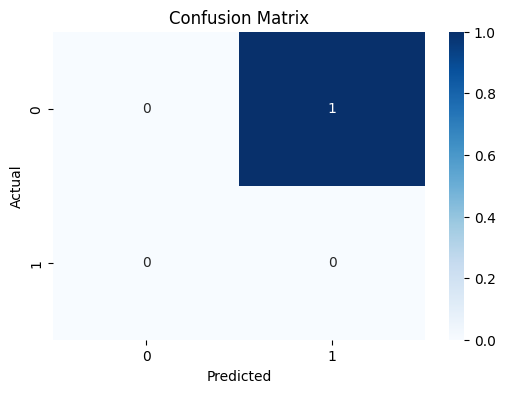

In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%\n")

# Detailed classification report
print("📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Automating the EDA Pipeline Functionally**

🔍 Dataset Shape: (5, 21)

🧾 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5 non-null      object 
 1   gender            5 non-null      object 
 2   SeniorCitizen     5 non-null      int64  
 3   Partner           5 non-null      object 
 4   Dependents        5 non-null      object 
 5   tenure            5 non-null      int64  
 6   PhoneService      5 non-null      object 
 7   MultipleLines     5 non-null      object 
 8   InternetService   5 non-null      object 
 9   OnlineSecurity    5 non-null      object 
 10  OnlineBackup      5 non-null      object 
 11  DeviceProtection  5 non-null      object 
 12  TechSupport       5 non-null      object 
 13  StreamingTV       5 non-null      object 
 14  StreamingMovies   5 non-null      object 
 15  Contract          5 non-null      object 
 16  Paperle

<ipython-input-11-d829dea7be16>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette='Set2')


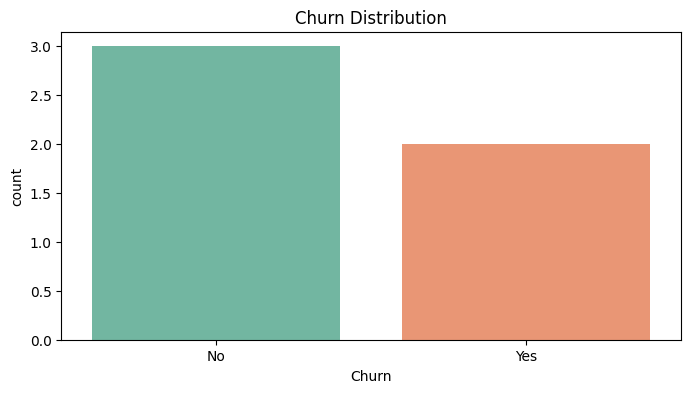

<ipython-input-11-d829dea7be16>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Pastel1')


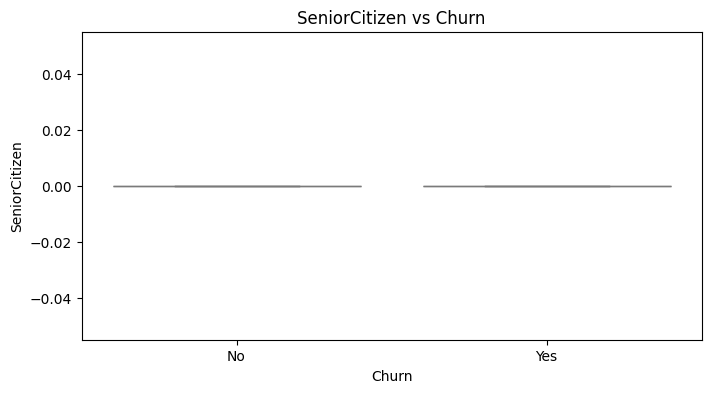

<ipython-input-11-d829dea7be16>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Pastel1')


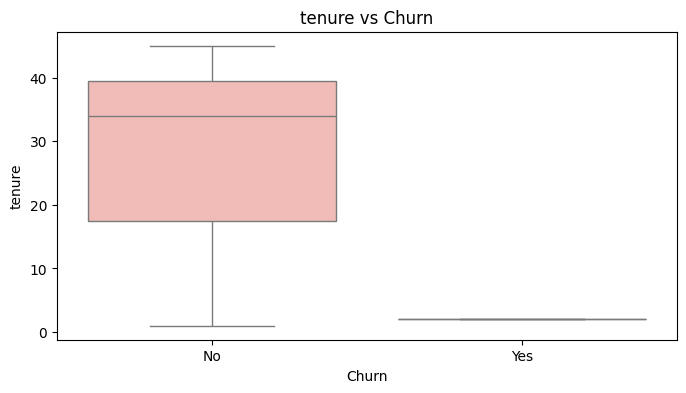

<ipython-input-11-d829dea7be16>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Pastel1')


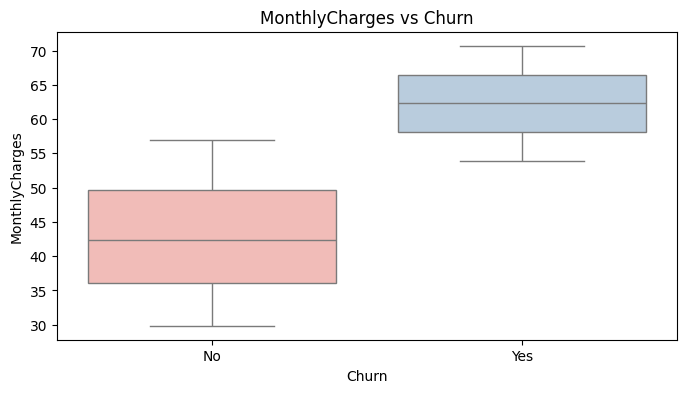

<ipython-input-11-d829dea7be16>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='Pastel1')


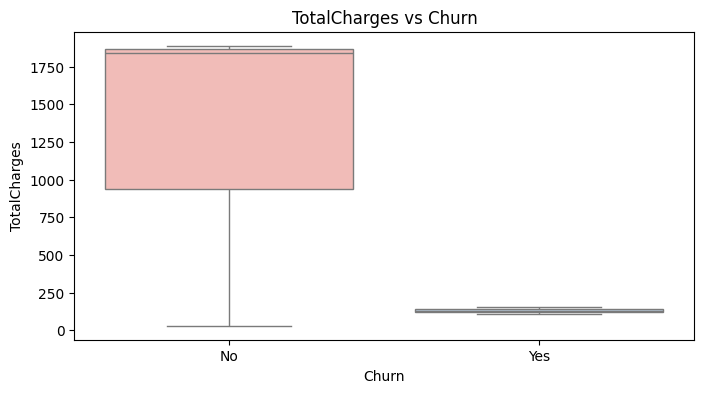

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def automated_eda_pipeline(df, target_col):
    print("🔍 Dataset Shape:", df.shape)

    print("\n🧾 Column Info:")
    print(df.info())

    print("\n📈 Descriptive Stats:")
    print(df.describe(include='all'))

    print("\n🧹 Missing Values:")
    print(df.isnull().sum())

    if target_col in df.columns:
        print(f"\n📌 Target Column Distribution ({target_col}):")
        print(df[target_col].value_counts())

        # Count Plot
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=target_col, palette='Set2')
        plt.title(f"{target_col} Distribution")
        plt.show()

        # Numerical vs Target
        num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        for col in num_cols:
            if col != target_col:
                plt.figure(figsize=(8, 4))
                sns.boxplot(data=df, x=target_col, y=col, palette='Pastel1')
                plt.title(f"{col} vs {target_col}")
                plt.show()
    else:
        print(f"⚠️ Target column '{target_col}' not found in dataset.")

# Example usage:
automated_eda_pipeline(df, 'Churn')

**Save Model & Make Predictions on New Data**

In [ ]:
import joblib

# Save the trained model
model_path = "/content/customer_churn_model.pkl"
joblib.dump(model, model_path)

print(f"✅ Model saved to: {model_path}")

✅ Model saved to: /content/customer_churn_model.pkl


** Load the Model & Predict New Data**

In [ ]:
print("Model trained on features:")
print(X.columns.tolist())

Model trained on features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6c2aabb9b844315ada18a2f48f84557e6e4ab88abb8141bf1a35236f11495dfc
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Source Data/Telco_Customer_Churn_Sample.csv")  # Update path if needed

# Create the profile report
profile = ProfileReport(df, title="Customer Churn EDA Report", explorative=True)

# Display in notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 62.59it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]